## Facebook Prophet 
Prophet is a time series forecasting tool developed by Facebook that decomposes time series data into trend, seasonality, holidays, and additional regressors. It employs the following components:

1. **Trend**: Prophet models the trend using a piecewise linear or logistic growth model, capturing changes in the underlying trend over time.

2. **Seasonality**: It captures periodic patterns in the data using Fourier series, allowing for flexible modeling of seasonal effects.

3. **Holidays**: Prophet allows users to specify custom holidays and their impacts on the time series, incorporating additional indicator variables for holiday effects.

4. **Additional Regressors**: It supports the inclusion of additional regressors that may influence the time series, such as external factors or covariates.

5. **Error Term**: The model includes an error term to account for noise and unexplained variability in the data.

Prophet employs a Bayesian approach for parameter estimation, optimizing the model parameters to maximize the posterior probability distribution using Markov Chain Monte Carlo (MCMC) sampling or optimization algorithms.

Overall, Prophet offers a flexible and customizable framework for time series forecasting, capable of capturing various patterns and effects present in the data, making it widely used in both academic and industry settings.


In the equation
$ y(t) = g(t) + s(t) + h(t) + \epsilon_t $ used in Prophet:

- $ y(t) $: Represents the observed value of the time series at time $ t $.
- $ g(t) $: Denotes the trend component of the time series, capturing the overall directionality or long-term movement.
- $ s(t) $: Represents the seasonality component, capturing repetitive patterns that occur over fixed intervals, such as daily, weekly, or yearly patterns.
- $ h(t) $: Represents the holiday effects, accounting for deviations from the typical trend or seasonality due to holidays or special events.
- $ \epsilon_t $: Denotes the error term, representing the random fluctuations or noise in the data that are not accounted for by the trend, seasonality, or holiday effects.

- Additive model at the moment, but in some cases, we might need the multiplicative model

### NOTE:
fbProphet has some installation problem in M1 mac, tried conda and other tools but didnt help. SO `using Prophet instead of fbpropehet`

In [1]:
from prophet import Prophet

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeStamp  49205 non-null  object 
 1   demand     49124 non-null  float64
 2   precip     48975 non-null  float64
 3   temp       49019 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [5]:
df['timeStamp'] = pd.to_datetime(df['timeStamp']) 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [7]:
ny_df = df.set_index('timeStamp')

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

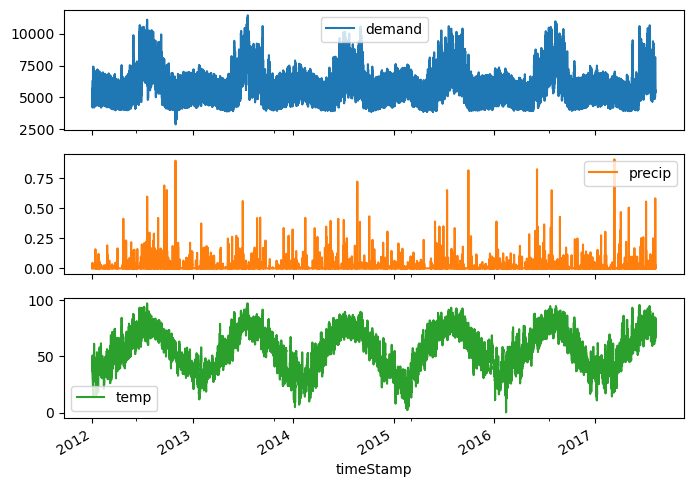

In [8]:
ny_df.plot(subplots=True)

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

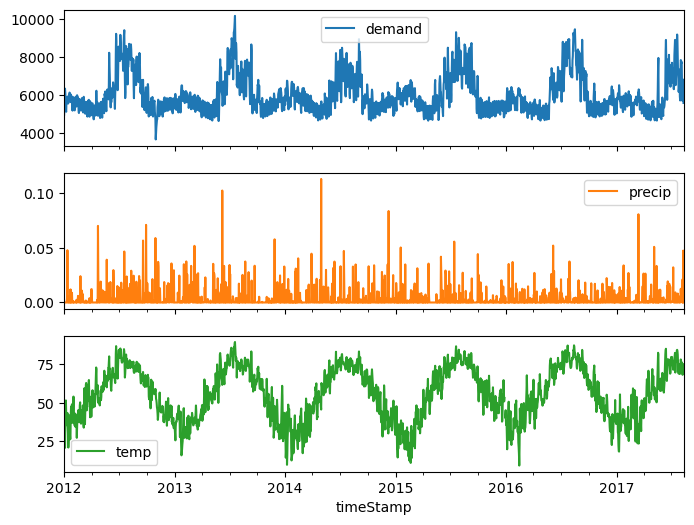

In [9]:
ny_df.resample('D').mean().plot(subplots=True)

In [10]:
ny_df_daily = ny_df.resample('D').mean()

#### NOTE:

By renaming your columns using `.rename({'timeStamp':'ds','demand':'y'}, axis='columns')`, you're ensuring that your DataFrame conforms to Prophet's input requirements. The 'timeStamp' column is renamed to 'ds', representing the timestamps, and the 'demand' column is renamed to 'y', representing the demand values. This labeling is necessary for Prophet to correctly interpret your data when fitting the model and making predictions.

In [11]:
ny_df_final = ny_df_daily.reset_index()[['timeStamp', 'demand']].rename({'timeStamp': 'ds', 'demand':'y'}, axis ='columns')

In [12]:
ny_df_final

ds            y
0    2012-01-01  4954.833333
1    2012-01-02  5302.954167
2    2012-01-03  6095.512500
3    2012-01-04  6336.266667
4    2012-01-05  6130.245833
...         ...          ...
2046 2017-08-08  6471.626042
2047 2017-08-09  6811.112167
2048 2017-08-10  5582.297000
2049 2017-08-11          NaN
2050 2017-08-12          NaN

[2051 rows x 2 columns]

In [14]:
train=ny_df_final[(ny_df_final['ds'] >= '2012-01-01') & (ny_df_final['ds'] <= '2017-04-30')]
test=ny_df_final[(ny_df_final['ds'] > '2017-04-30')]

In [23]:
train

ds            y
0    2012-01-01  4954.833333
1    2012-01-02  5302.954167
2    2012-01-03  6095.512500
3    2012-01-04  6336.266667
4    2012-01-05  6130.245833
...         ...          ...
1942 2017-04-26  5342.687591
1943 2017-04-27  5445.442917
1944 2017-04-28  5648.995917
1945 2017-04-29  5467.143125
1946 2017-04-30  4855.954500

[1947 rows x 2 columns]

In [16]:
# interval_width is the confidence interval. 

m = Prophet(interval_width = 0.95, yearly_seasonality = True)

In [17]:
m.fit(train)

07:00:35 - cmdstanpy - INFO - Chain [1] start processing
07:00:36 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
m.params

OrderedDict([('lp__', array([[5008.86]])),
             ('k', array([[0.0661555]])),
             ('m', array([[0.594991]])),
             ('delta',
              array([[-8.62336e-08, -8.25715e-03, -6.69154e-02, -3.56537e-04,
                       8.18044e-09, -1.15747e-08,  1.86964e-08, -1.09353e-07,
                      -1.24778e-07, -2.78684e-07, -4.20706e-02, -4.74545e-02,
                      -4.95735e-06, -1.16858e-07,  1.72649e-01,  4.44389e-02,
                      -2.46391e-08, -6.77339e-02, -6.03455e-02,  6.78302e-08,
                      -4.89534e-08,  1.52921e-08,  1.17086e-02,  2.21236e-03,
                       7.73196e-08]])),
             ('sigma_obs', array([[0.0460382]])),
             ('beta',
              array([[-0.0347312 , -0.0704621 ,  0.0575634 ,  0.0470468 , -0.0140682 ,
                      -0.00499821, -0.00389564, -0.00073365,  0.00240313, -0.00756604,
                       0.00403654,  0.00482887, -0.00790763, -0.00470835,  0.00700649,
          

In [19]:
# as we have 104 rows in test data
future = m.make_future_dataframe(periods = 104)
future.tail()

ds
2046 2017-08-08
2047 2017-08-09
2048 2017-08-10
2049 2017-08-11
2050 2017-08-12

#### NOTE:
make_future_dataframe, gives the final output which is the sum of datapoints in train and test set. Note, we specify the test set

In [22]:
future

ds
0    2012-01-01
1    2012-01-02
2    2012-01-03
3    2012-01-04
4    2012-01-05
...         ...
2046 2017-08-08
2047 2017-08-09
2048 2017-08-10
2049 2017-08-11
2050 2017-08-12

[2051 rows x 1 columns]

In [20]:
forecast = m.predict(future)

In [21]:
forecast

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0    2012-01-01  6047.059635  4220.129697  6074.804074  6047.059635   
1    2012-01-02  6047.405142  4825.536870  6686.757722  6047.405142   
2    2012-01-03  6047.750649  4987.374694  6839.334118  6047.750649   
3    2012-01-04  6048.096156  4983.820161  6852.525234  6048.096156   
4    2012-01-05  6048.441663  4994.905077  6805.481859  6048.441663   
...         ...          ...          ...          ...          ...   
2046 2017-08-08  6087.775193  6655.596140  8482.896248  6065.744755   
2047 2017-08-09  6087.796216  6637.715560  8476.439222  6065.211769   
2048 2017-08-10  6087.817238  6604.741504  8453.642948  6064.650684   
2049 2017-08-11  6087.838260  6603.644953  8494.257192  6064.379581   
2050 2017-08-12  6087.859282  5968.957413  7865.442739  6064.127488   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     6047.059635     -929.680183           -929.680183           -929.680183   
1     6047.405142     -245.726612           -245.726612           -245.726612   
2     6047.750649     -129.129484           -129.129484           -129.129484   
3     6048.096156     -121.901926           -121.901926           -121.901926   
4     6048.441663     -151.732292           -151.732292           -151.732292   
...           ...             ...                   ...                   ...   
2046  6106.907084     1501.867875           1501.867875           1501.867875   
2047  6107.448314     1491.015203           1491.015203           1491.015203   
2048  6107.989543     1445.768191           1445.768191           1445.768191   
2049  6108.529108     1401.022488           1401.022488           1401.022488   
2050  6108.933306      826.240968            826.240968            826.240968   

          weekly  weekly_lower  weekly_upper       yearly  yearly_lower  \
0    -541.107456   -541.107456   -541.107456  -388.572727   -388.572727   
1     133.863043    133.863043    133.863043  -379.589655   -379.589655   
2     240.785697    240.785697    240.785697  -369.915181   -369.915181   
3     237.721607    237.721607    237.721607  -359.623534   -359.623534   
4     197.064936    197.064936    197.064936  -348.797228   -348.797228   
...          ...           ...           ...          ...           ...   
2046  240.785697    240.785697    240.785697  1261.082178   1261.082178   
2047  237.721607    237.721607    237.721607  1253.293596   1253.293596   
2048  197.064936    197.064936    197.064936  1248.703255   1248.703255   
2049  153.865591    153.865591    153.865591  1247.156897   1247.156897   
2050 -422.193418   -422.193418   -422.193418  1248.434387   1248.434387   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0      -388.572727                   0.0                         0.0   
1      -379.589655                   0.0                         0.0   
2      -369.915181                   0.0                         0.0   
3      -359.623534                   0.0                         0.0   
4      -348.797228                   0.0                         0.0   
...            ...                   ...                         ...   
2046   1261.082178                   0.0                         0.0   
2047   1253.293596                   0.0                         0.0   
2048   1248.703255                   0.0                         0.0   
2049   1247.156897                   0.0                         0.0   
2050   1248.434387                   0.0                         0.0   

      multiplicative_terms_upper         yhat  
0                            0.0  5117.379452  
1                            0.0  5801.678530  
2                            0.0  5918.621165  
3                            0.0  5926.194230  
4                            0.0  5896.709371  
...                          ...          ...  
2046                         0.0  7589.643068  
2047                         0.0  757

In [24]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
2046 2017-08-08  7589.643068  6655.596140  8482.896248
2047 2017-08-09  7578.811419  6637.715560  8476.439222
2048 2017-08-10  7533.585429  6604.741504  8453.642948
2049 2017-08-11  7488.860749  6603.644953  8494.257192
2050 2017-08-12  6914.100251  5968.957413  7865.442739

<Axes: xlabel='ds'>

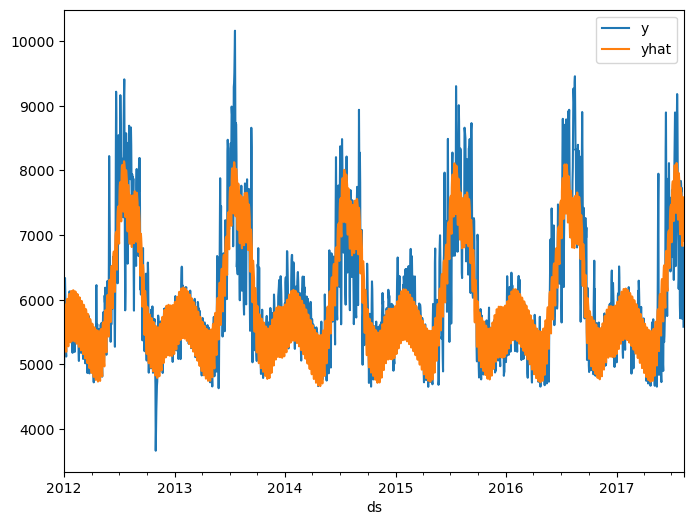

In [25]:
# y is the actual value and yhat is the predicted value 

pd.concat([ny_df_final.set_index('ds')['y'], forecast.set_index('ds')['yhat']], axis = 1).plot()

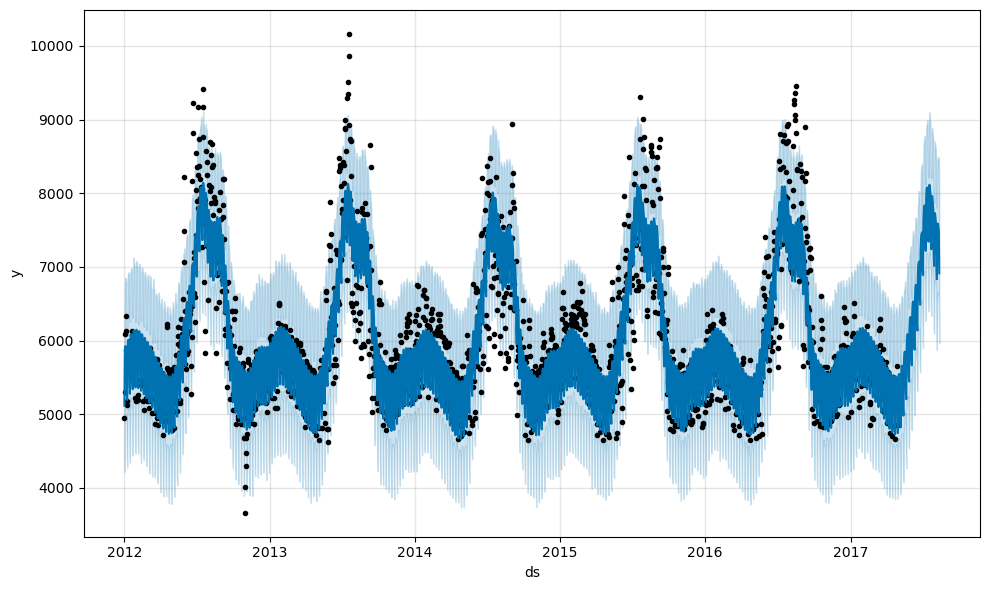

In [26]:
fig1 = m.plot(forecast)

#### NOTE
here light blue is the confidence interval, points are actual value from the dataset (labeled as y in above plot), and dark-blue is the y_pred

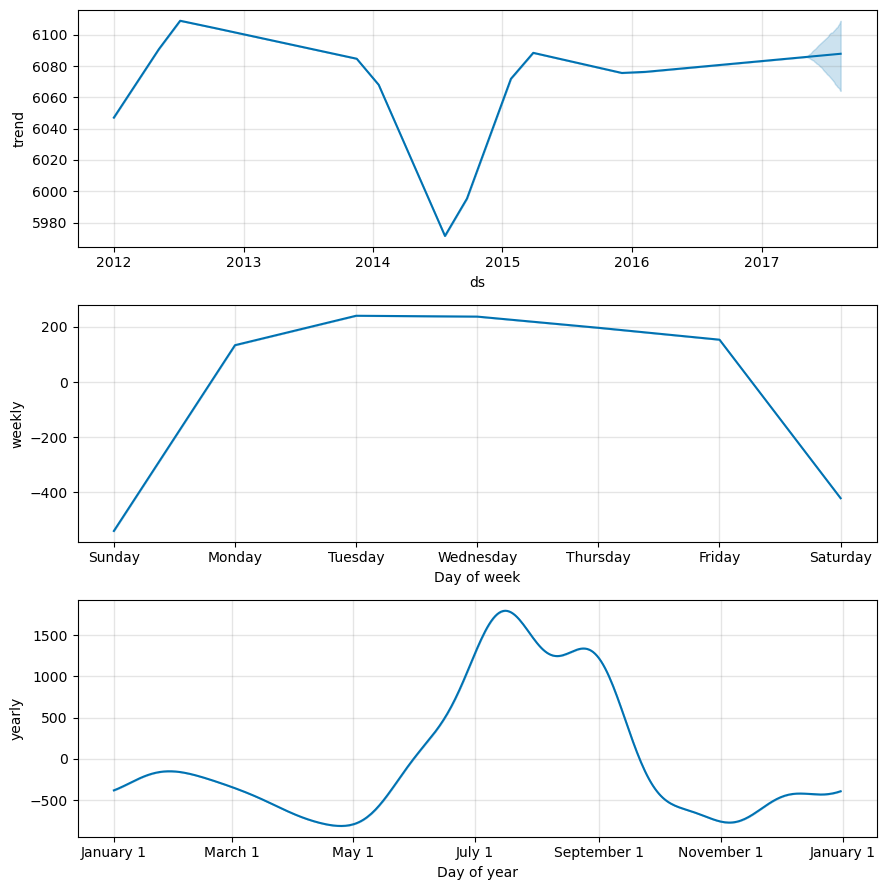

In [27]:
fig2 = m.plot_components(forecast)

In [28]:
# Here, we are trying to reflect the changepoints in the trend to the forecasted value plot
from prophet.plot import add_changepoints_to_plot

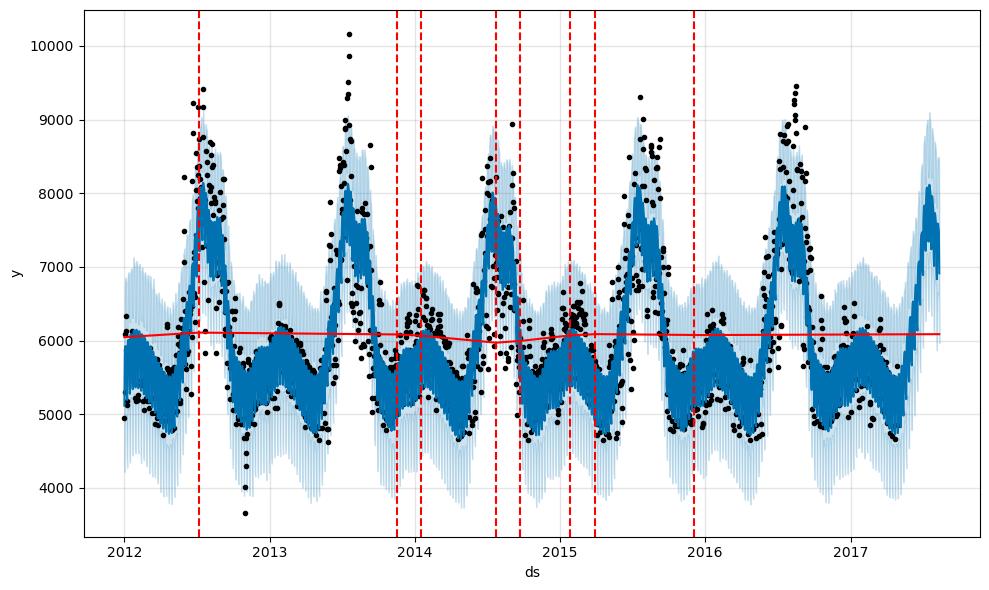

In [30]:
fig = m.plot(forecast)
# add_changepoints_to_plot is only for 80% confidence interval by default
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [36]:
deltas = m.params['delta']
deltas

array([[-8.62336e-08, -8.25715e-03, -6.69154e-02, -3.56537e-04,
         8.18044e-09, -1.15747e-08,  1.86964e-08, -1.09353e-07,
        -1.24778e-07, -2.78684e-07, -4.20706e-02, -4.74545e-02,
        -4.95735e-06, -1.16858e-07,  1.72649e-01,  4.44389e-02,
        -2.46391e-08, -6.77339e-02, -6.03455e-02,  6.78302e-08,
        -4.89534e-08,  1.52921e-08,  1.17086e-02,  2.21236e-03,
         7.73196e-08]])

In [38]:
m.changepoints

62     2012-03-03
124    2012-05-04
187    2012-07-06
249    2012-09-06
311    2012-11-07
373    2013-01-08
436    2013-03-12
498    2013-05-13
560    2013-07-14
622    2013-09-14
685    2013-11-16
747    2014-01-17
809    2014-03-20
871    2014-05-21
934    2014-07-23
996    2014-09-23
1058   2014-11-24
1120   2015-01-25
1183   2015-03-29
1245   2015-05-30
1307   2015-07-31
1369   2015-10-01
1432   2015-12-03
1494   2016-02-03
1556   2016-04-05
Name: ds, dtype: datetime64[ns]

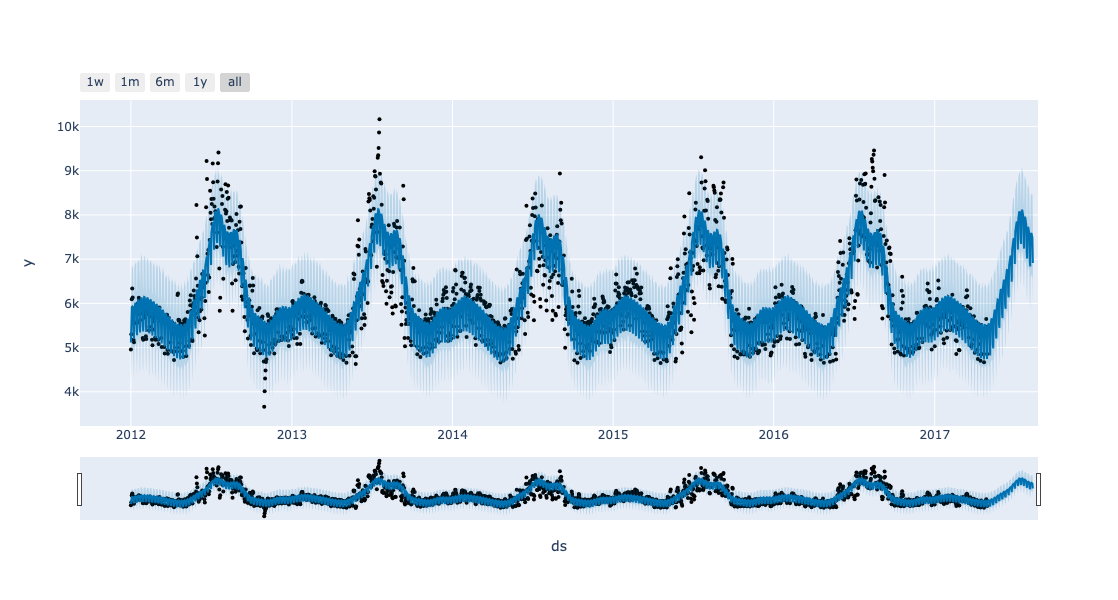

In [39]:
from prophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

In [40]:
### KNOWING HOW WELL OUR MODEL IS 

from prophet.diagnostics import cross_validation

In [41]:
cv_results = cross_validation(model = m, initial = '731 days', horizon ='365 days')

  0%|          | 0/5 [00:00<?, ?it/s]

07:28:11 - cmdstanpy - INFO - Chain [1] start processing
07:28:11 - cmdstanpy - INFO - Chain [1] done processing
07:28:12 - cmdstanpy - INFO - Chain [1] start processing
07:28:12 - cmdstanpy - INFO - Chain [1] done processing
07:28:12 - cmdstanpy - INFO - Chain [1] start processing
07:28:12 - cmdstanpy - INFO - Chain [1] done processing
07:28:12 - cmdstanpy - INFO - Chain [1] start processing
07:28:12 - cmdstanpy - INFO - Chain [1] done processing
07:28:12 - cmdstanpy - INFO - Chain [1] start processing
07:28:12 - cmdstanpy - INFO - Chain [1] done processing


### NOTE:
5/5 comes here from how many time it will do cross validation on initial using 50% of horizon dataset. 

So 50% of horizon dataset is ~ 180 and 730/180 is almost 5

In [42]:
cv_results

ds         yhat   yhat_lower   yhat_upper            y     cutoff
0    2014-05-02  5560.591034  4677.064485  6362.351864  5460.325000 2014-05-01
1    2014-05-03  4970.588774  4189.364563  5773.538507  4893.683333 2014-05-01
2    2014-05-04  4846.718461  3981.198367  5689.530774  4764.137500 2014-05-01
3    2014-05-05  5527.605232  4717.229743  6384.466413  5406.762500 2014-05-01
4    2014-05-06  5622.518379  4797.500683  6404.496252  5409.750000 2014-05-01
...         ...          ...          ...          ...          ...        ...
1820 2017-04-26  5216.242613  4316.063355  6125.085790  5342.687591 2016-04-30
1821 2017-04-27  5168.903868  4225.661806  6175.749137  5445.442917 2016-04-30
1822 2017-04-28  5117.268073  4117.799540  6043.680761  5648.995917 2016-04-30
1823 2017-04-29  4541.683541  3647.569546  5492.130787  5467.143125 2016-04-30
1824 2017-04-30  4438.700169  3578.029858  5387.651146  4855.954500 2016-04-30

[1825 rows x 6 columns]

In [43]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p

horizon            mse        rmse         mae      mape  \
0    36 days 12:00:00  251640.810099  501.638127  405.735880  0.072945   
1    37 days 00:00:00  258445.672323  508.375523  413.158488  0.074238   
2    37 days 12:00:00  260723.830515  510.611232  416.508246  0.074813   
3    38 days 00:00:00  263582.109633  513.402483  419.684493  0.075090   
4    38 days 12:00:00  267243.914610  516.956395  424.877516  0.075918   
..                ...            ...         ...         ...       ...   
653 363 days 00:00:00  262666.895762  512.510386  449.402078  0.082965   
654 363 days 12:00:00  264230.074648  514.033145  450.401767  0.083141   
655 364 days 00:00:00  268737.494985  518.398973  454.081044  0.084005   
656 364 days 12:00:00  268664.631778  518.328691  453.707228  0.083973   
657 365 days 00:00:00  264402.960183  514.201284  450.701827  0.083851   

        mdape     smape  coverage  
0    0.065404  0.071944  0.890110  
1    0.065709  0.073152  0.884615  
2    0.066789  0.073756  0.884615  
3    0.067859  0.074007  0.884615  
4    0.068272  0.074862  0.884615  
..        ...       ...       ...  
653  0.081884  0.082001  0.983516  
654  0.081930  0.082274  0.983516  
655  0.084023  0.083142  0.983516  
656  0.084023  0.083196  0.983516  
657  0.084189  0.082964  0.983516  

[658 rows x 8 columns]